In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Logistic Regression

<font size=3>
&emsp;&emsp;In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.  
&emsp;&emsp;Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.  
&emsp;&emsp;Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.
</font>

In [2]:
data = pd.read_csv('./ex2data1.txt', names=['Exam_1', 'Exam_2', 'Admitted'])
data.head()

,Exam_1,Exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
def loadData(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    df = pd.concat([ones, df], axis=1)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values.reshape(-1, 1)
    return np.matrix(X), np.matrix(y)

<font size=3>
&emsp;&emsp;加载数据，并查看X, y的维度是否正确。
</font>

In [4]:
X, y = loadData(data)
X.shape, y.shape

((100, 3), (100, 1))

## 1.1 Visualizing the data

<font size=3>
&emsp;&emsp;Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
</font>

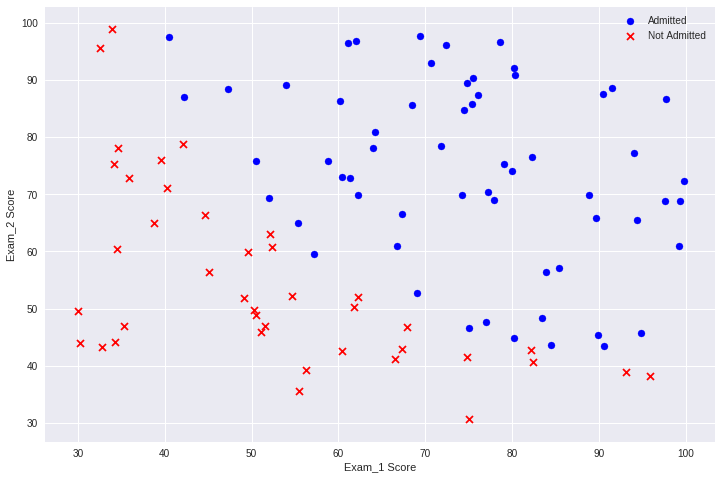

In [5]:
positive = data[data['Admitted'] == 1]
negative = data[data['Admitted'] == 0]

plt.figure(figsize=(12, 8))
plt.scatter(positive['Exam_1'], positive['Exam_2'], color='blue', marker='o', label='Admitted')
plt.scatter(negative['Exam_1'], negative['Exam_2'], color='red', marker='x', label='Not Admitted')
plt.legend()
plt.xlabel('Exam_1 Score')
plt.ylabel('Exam_2 Score')
plt.show()

## 1.2 Implementation

### 1.2.1 Sigmoid function

<font size=3>
&emsp;&emsp;Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as: **$$h_{\theta}(x)=g({\theta}^Tx)$$**
</font>

<font size=3>
&emsp;&emsp;where function g is the sigmoid function. The sigmoid function is defined as: **$$g(z)=\frac{1}{1+e^{-z}}$$**  
</font>

In [6]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

<font size=3>
&emsp;&emsp;让我们做一个快速检查，确保它可以工作。
</font>

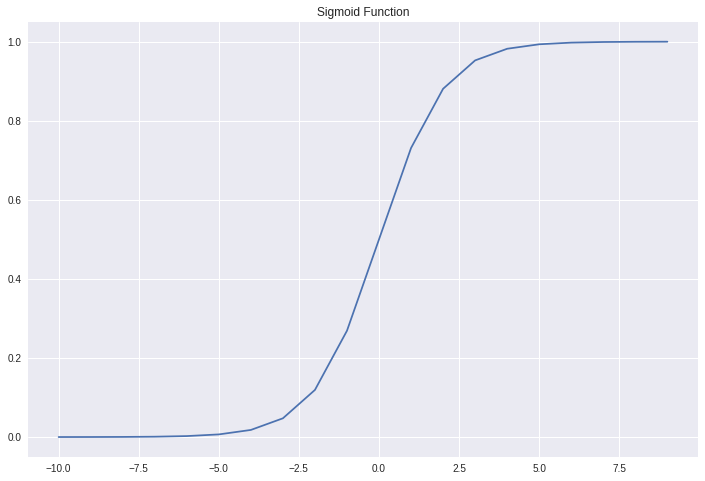

In [7]:
nums = np.arange(-10, 10, step=1)

plt.figure(figsize=(12, 8))
plt.plot(nums, sigmoid(nums))
plt.title('Sigmoid Function')
plt.show()

### 1.2.3 Cost function and gradient

<font size=3>
&emsp;&emsp;Now you will implement the cost function and gradient for logistic regression. Recall that the cost function in logistic regression is **$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$$**
</font>

<font size=3>
&emsp;&emsp;and the gradient of the cost is a vector of the same length as ${\theta}$ where the $j^{th}$ element *(for j = 0,1,...,n)* is defined as follows: **$$\frac{{\partial}J(\theta)}{\partial{\theta}_j}=\frac{1}{m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j$$**
</font>

<font size=3>
&emsp;&emsp;Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic have different definitions of $h_{\theta}(x)$.
</font>

In [8]:
# 初始化theta为零
def initializeWithZeros(dim):
    return np.zeros(dim)

In [9]:
def computeCost(X, y, theta):
    first = np.multiply(-y, np.log(sigmoid(X @ theta)))
    second = np.multiply(1 - y, np.log(1-sigmoid(X @ theta)))
    return np.mean(first - second)

In [10]:
# 正确答案为0.693
theta = initializeWithZeros(X.shape[1])
cost = computeCost(X, y, theta)
cost

0.69314718055994529

### 1.2.4 使用梯度下降法寻找最优参数

In [11]:
def batchGradientDecent(X, y, theta, alpha, iters):
    
    m = X.shape[0]
    cost = np.zeros(iters)
    
    for i in range(iters):
        gradient = np.dot(X.T, sigmoid(X @ theta) - y) / m
        theta = theta - alpha * gradient
        
        cost[i] = computeCost(X, y, theta)
        
        if i % 50000 == 0:
            print('第{iters}轮:{cost}'.format(iters=i, cost=cost[i]))
            
    return theta, cost

In [12]:
X, y = loadData(data)
alpha = 0.000001
iters = 500000
theta = initializeWithZeros(X.shape[1])
theta1, cost1 = batchGradientDecent(X, y, theta, alpha, iters)

第0轮:0.6928764038075428
第50000轮:0.6295780590780752
第100000轮:0.6293338830821339
第150000轮:0.6290905746767632
第200000轮:0.6288474761373234
第250000轮:0.6286045870699931
第300000轮:0.6283619073006185
第350000轮:0.628119436655143
第400000轮:0.6278771749595334
第450000轮:0.6276351220397811


In [13]:
# 对数据进行标准化处理
X, y = loadData(data)
X[:,1:3] -= X[:,1:3].mean(axis=0)
X[:,1:3] /= X[:,1:3].std(axis=0)

In [14]:
alpha = 0.01
iters = 200000
theta = initializeWithZeros(X.shape[1])
theta2, cost2 = batchGradientDecent(X, y, theta, alpha, iters)

第0轮:0.6916282011267486
第50000轮:0.20352911584883715
第100000轮:0.2034977922166995
第150000轮:0.2034977018657916


<font size=3>
&emsp;&emsp;在没有对数据进行标准化的情况下，进行梯度下降的效果是非常差的，损失函数的收敛速度十分的慢。同时，学习速率 $\alpha$ 的值要取得非常小，否则，损失函数的波动十分明显，迭代次数也因此非常大。最后，损失函数的值为0.62。  
&emsp;&emsp;在对数据进行标准化之后，损失函数的收敛速度十分快。最终，损失函数的值为0.20，改善效果十分明显。因此，在使用梯度下降法求解损失函数最小值时，对数据进行标准化十分重要。
</font>

牛顿法网址
https://blog.csdn.net/itplus/article/details/21896453

# 2. Regularized logistic regression

<font size=3>
&emsp;&emsp;In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.  
&emsp;&emsp;Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.  
</font>

## 2.1 Visualizing the data

<font size=3>
&emsp;&emsp;首先，对数据进行可视化。
</font>

In [125]:
data = pd.read_csv('ex2data2.txt', names=['Test_1', 'Test_2', 'Accepted'])
data.head()

,Test_1,Test_2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


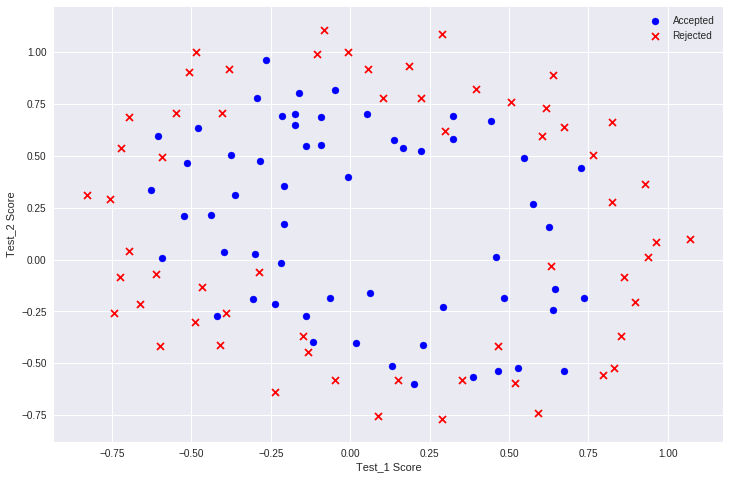

In [126]:
positive = data[data['Accepted'] == 1]
negative = data[data['Accepted'] == 0]

plt.figure(figsize=(12, 8))
plt.scatter(positive['Test_1'], positive['Test_2'], color='blue', marker='o', label='Accepted')
plt.scatter(negative['Test_1'], negative['Test_2'], color='red', marker='x', label='Rejected')
plt.legend()
plt.xlabel('Test_1 Score')
plt.ylabel('Test_2 Score')
plt.show()

<font size=3>
&emsp;&emsp;This figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regresion will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.
</font>

## 2.2 Feature mapping

<font size=3>
&emsp;&emsp;One way to fit the data better is to create more features from each data point. Now, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.
</font>

<font size=3>
**$$mapFeature(x)=\begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x^2_1 \\ x_1x_2 \\ x^2_2 \\ x^3_1 \\ ... \\ x_1x^5_2 \\ x^6_2 \end{bmatrix}$$**
</font>

In [127]:
def featureMapping(x1, x2, power, as_ndarray=False):
    
    data = {"{}{}".format(i - p, p): np.power(x1, i - p) * np.power(x2, p)
                for i in range(power + 1)
                for p in range(i + 1)
           }
    
    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)

In [128]:
x1 = np.array(data.Test_1)
x2 = np.array(data.Test_2)

In [129]:
X = featureMapping(x1, x2, 6)
X.head()

,00,01,02,03,04,05,06,10,11,12,...,30,31,32,33,40,41,42,50,51,60
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


<font size=3>
&emsp;&emsp;As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.  
&emsp;&emsp;While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.
</font>

## 2.3 Cost function and gradient

<font size=3>
&emsp;&emsp;Now you will implement code to compute the cost function and gradient for regularized logistic regression.  
&emsp;&emsp;Recall that the regularized cost function in logistic regression is **$$J(\theta)=\frac{1}{m}\sum^m_{i=1}\left[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))\right]+\frac{\lambda}{2m}\sum^m_{j=1}{\theta}^2_j$$**
</font>

<font size=3>
&emsp;&emsp;Note that you should not regularize the parameter $\theta_0$.
</font>

In [130]:
def computeRegularizedCost(theta, X, y, l):
    
    m = X.shape[0]
    theta_j1_to_n = theta[1:]
    
    first = np.multiply(-y, np.log(sigmoid(X @ theta)))
    second = np.multiply(1-y, np.log(1-sigmoid(X @ theta)))
    regularizedTerm = (l / (2*m)) * np.power(theta_j1_to_n, 2).sum()
    
    return np.mean(first - second) + regularizedTerm

In [131]:
# 参数初始化以及数据预处理
theta = initializeWithZeros(X.shape[1])
X = featureMapping(x1, x2, 6, as_ndarray=True)
y = data.iloc[:, -1].as_matrix()

In [132]:
# 正确答案为 0.693
cost = computeRegularizedCost(theta, X, y, 1)
cost

0.6931471805599454

<font size=3>
&emsp;&emsp;The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows: **$$\frac{{\partial}J(\theta)}{\partial\theta_0}=\frac{1}{m}\sum^m_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j\qquad for\,j=0$$**  
**$$\frac{{\partial}J(\theta)}{\partial\theta_j}=\left(\frac{1}{m}\sum^m_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j\right)+\frac{\lambda}{m}\theta_j\qquad for\,j\geq1$$**
</font>

In [133]:
def regularizedGradient(theta, X, y, l):
    
    m = X.shape[0]
    theta_j1_to_n = theta[1:]
    
    grad = np.dot(X.T, sigmoid(X @ theta) - y) / m
    regularizedTheta = (l / m) * theta_j1_to_n
    
    regularizedTerm = np.concatenate([np.array([0]), regularizedTheta])
    
    return grad + regularizedTerm

In [134]:
def batchGradientDescent(X, y, theta, alpha, iters, l, printFlag=True):
    
    cost = np.zeros(iters)
    
    for i in range(iters):
        theta = theta - alpha * regularizedGradient(theta, X, y, l)
        cost[i] = computeRegularizedCost(theta, X, y, l)
        
        if printFlag and i % 500 == 0:
            print('第{iters}轮:{cost}'.format(iters=i, cost=cost[i]))
    
    return theta, cost

In [186]:
alpha= 0.3
iters = 5000
l=1
theta = initializeWithZeros(X.shape[1])
theta, cost = batchGradientDescent(X, y, theta, alpha, iters, l)

第0轮:0.689392100814767
第500轮:0.5303383613168465
第1000轮:0.5290349118070177
第1500轮:0.5290039786047559
第2000轮:0.5290027945476369
第2500轮:0.5290027336043155
第3000轮:0.5290027299629998
第3500轮:0.5290027297293425
第4000轮:0.5290027297137846
第4500轮:0.5290027297127253


## 2.4 Plotting the decision boundary

<font size=3>
&emsp;&emsp;决策边界的方程为 $\theta^TX=0$ 的超平面。因此，需要找到所有满足该方程的x。
&emsp;&emsp;Instead of solving polynomial equation, just create a coridate x, y grid that is dense enough, and find all those $\theta^TX$ that is close enough to 0, then plot them.
</font>

In [174]:
def findDecisionBoundary(density, power, theta, threshold):
    
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    coordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*coordinates)
    mappedCord = featureMapping(x_cord, y_cord, power)
    
    innerProduct = mappedCord.as_matrix() @ theta

    decision = mappedCord[np.abs(innerProduct) < threshold]
    
    return decision['10'], decision['01']

In [180]:
def featureMappedLogisticRegression(power, l, alpha, iters):
    
    data = pd.read_csv('ex2data2.txt', names=['Test_1', 'Test_2', 'Accepted'])
    x1 = np.array(data.Test_1)
    x2 = np.array(data.Test_2)
    X = featureMapping(x1, x2, power, as_ndarray=True)
    y = data.iloc[:, -1].as_matrix()
    
    theta = initializeWithZeros(X.shape[1])
    
    theta, cost = batchGradientDescent(X, y, theta, alpha, iters, l, printFlag=False)
    
    print('The cost is {}:'.format(computeRegularizedCost(theta, X, y, l)))
    
    return theta

In [181]:
def drawDecisionBoundary(power, l, alpha=0.3, iters=5000):
    
    density = 1000
    threshold = 2 *10 ** -3
    
    theta = featureMappedLogisticRegression(power, l, alpha, iters)
    x, y = findDecisionBoundary(density, power, theta, threshold)
    
    data = pd.read_csv('ex2data2.txt', names=['Test_1', 'Test_2', 'Accepted'])
    plt.figure(figsize=(12, 8))
    sns.lmplot('Test_1', 'Test_2', hue='Accepted', data=data, size=6, fit_reg=False, scatter_kws={"s": 100})
    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

The cost is 0.529002729712652:


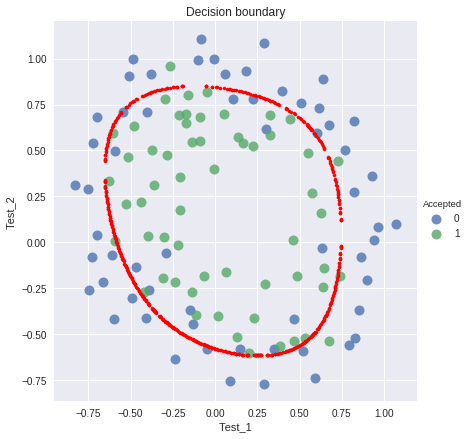

In [182]:
drawDecisionBoundary(power=6, l=1)

The cost is 0.25380047604665046:


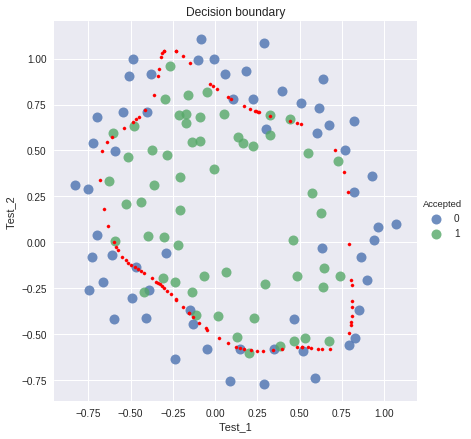

In [188]:
# 这里感觉有点不合理，我为了展示过拟合的效果，提高了power, alpha以及iters
# no regularization, overfitting
# lambda=0, 没有正则化
drawDecisionBoundary(power=10, l=0, alpha=15, iters=100000)

The cost is 0.6864838338726167:


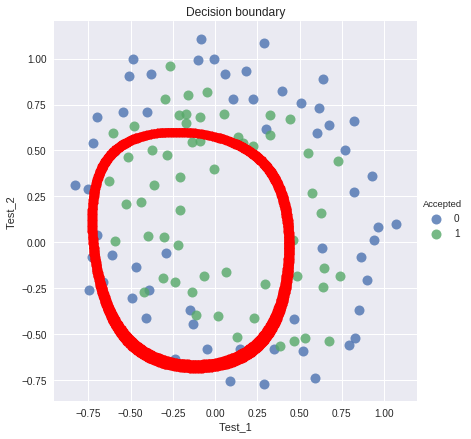

In [187]:
# too much regularization, underfitting
# lambda=100, 欠拟合
drawDecisionBoundary(power=6, l=100)

<font size=3>
&emsp;&emsp;Notice the changes in the decision boundary as you vary $\lambda$. With a small $\lambda$, you will find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data.  
&emsp;&emsp;With a larger $\lambda$, you will see a plot that shows an simpler decision boundary which still separates the positive and negatives fairly well. However, if $\lambda$ is set too high a value, you will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data.
</font>